# Importing Libraries and Databases

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Importing databases
# creating a path
path=r'C:\Users\William\July-2023 Airbnb Amsterdam'

In [3]:
df_calendar=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_calendar_cleaned.csv'), index_col = False)

# Data Cleaning

In [4]:
# Identifying missing values in Calenders database
df_calendar.isnull().sum()

Unnamed: 0          0
listing_id          0
date                0
available           0
price         6110879
dtype: int64

In [5]:
df_calendar.shape

(7310950, 5)

In [6]:
df_calendar.dropna()

,Unnamed: 0,listing_id,date,available,price
240,240,255809,2019-12-05,t,$150.00
241,241,255809,2019-12-04,t,$150.00
242,242,255809,2019-12-03,t,$150.00
243,243,255809,2019-12-02,t,$150.00
244,244,255809,2019-12-01,t,$150.00
...,...,...,...,...,...
7310945,7310945,29979667,2018-12-11,t,$139.00
7310946,7310946,29979667,2018-12-10,t,$139.00
7310947,7310947,29979667,2018-12-09,t,$139.00
7310948,7310948,29979667,2018-12-08,t,$139.00


In [7]:
df_calendar.shape

(7310950, 5)

In [8]:
df_calendar.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_calendar.drop('available', axis=1, inplace=True)

In [10]:
df_calendar.head(5)

,listing_id,date,price
0,2818,2019-12-05,NaN
1,73208,2019-08-30,NaN
2,73208,2019-08-29,NaN
3,73208,2019-08-28,NaN
4,73208,2019-08-27,NaN


In [11]:
df_calendar.dropna()

,listing_id,date,price
240,255809,2019-12-05,$150.00
241,255809,2019-12-04,$150.00
242,255809,2019-12-03,$150.00
243,255809,2019-12-02,$150.00
244,255809,2019-12-01,$150.00
...,...,...,...
7310945,29979667,2018-12-11,$139.00
7310946,29979667,2018-12-10,$139.00
7310947,29979667,2018-12-09,$139.00
7310948,29979667,2018-12-08,$139.00


In [12]:
df_calendar.columns

Index(['listing_id', 'date', 'price'], dtype='object')

In [13]:
type(df_calendar)

pandas.core.frame.DataFrame

In [14]:
# Reset index so that you can use the "Date" column as a filter

df_calendar_2 = df_calendar.reset_index()

In [15]:
# Set the "Date" column as the index

from datetime import datetime

df_calendar_2['datetime'] = pd.to_datetime(df_calendar_2['date']) # Create a datetime column from "Date.""
df_calendar_2 = df_calendar_2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_calendar_2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_calendar_2.head()

,index,listing_id,price
datetime,,,
2019-12-05,0,2818,NaN
2019-08-30,1,73208,NaN
2019-08-29,2,73208,NaN
2019-08-28,3,73208,NaN
2019-08-27,4,73208,NaN


In [16]:
df_calendar_2.dropna()

,index,listing_id,price
datetime,,,
2019-12-05,240,255809,$150.00
2019-12-04,241,255809,$150.00
2019-12-03,242,255809,$150.00
2019-12-02,243,255809,$150.00
2019-12-01,244,255809,$150.00
...,...,...,...
2018-12-11,7310945,29979667,$139.00
2018-12-10,7310946,29979667,$139.00
2018-12-09,7310947,29979667,$139.00


In [17]:
df_calendar_2.shape

(7310950, 3)

In [18]:
df_calendar_3=df_calendar_2.dropna()

In [19]:
df_calendar_3.shape

(1200071, 3)

In [20]:
# Exporting cleaned dataframes
df_calendar_3.to_csv(os.path.join(path, 'Data','Prepared Data', 'df_calendar_3_cleaned.csv'))

In [50]:
# Importing dataframe without '$'
df_calendar_3=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_calendar_3_cleaned.csv'), index_col = False)

In [51]:
df_calendar_3

,datetime,index,listing_id,price
0,2019-12-05,240,255809,150
1,2019-12-04,241,255809,150
2,2019-12-03,242,255809,150
3,2019-12-02,243,255809,150
4,2019-12-01,244,255809,150
...,...,...,...,...
1048570,2019-03-09,6641526,27631850,75
1048571,2019-03-08,6641527,27631850,75
1048572,2019-03-07,6641528,27631850,75
1048573,2019-03-03,6641532,27631850,75


In [52]:
# Reset index so that you can use the "Date" column as a filter

df_calendar = df_calendar_3.reset_index()

In [53]:
df_calendar.head(5)

,level_0,datetime,index,listing_id,price
0,0,2019-12-05,240,255809,150
1,1,2019-12-04,241,255809,150
2,2,2019-12-03,242,255809,150
3,3,2019-12-02,243,255809,150
4,4,2019-12-01,244,255809,150


In [54]:
df_calendar.drop('level_0', axis=1, inplace=True)

In [55]:
df_calendar.drop('index', axis=1, inplace=True)

In [56]:
df_calendar.drop('listing_id', axis=1, inplace=True)

In [57]:
df_calendar.head(5)

,datetime,price
0,2019-12-05,150
1,2019-12-04,150
2,2019-12-03,150
3,2019-12-02,150
4,2019-12-01,150


# Plotting Data

In [81]:
arr = np.array('df_calendar')

In [82]:
# Concert to tuple
df_calendar = tuple(df_calendar)
my_dict = {df_calendar: 'value'}

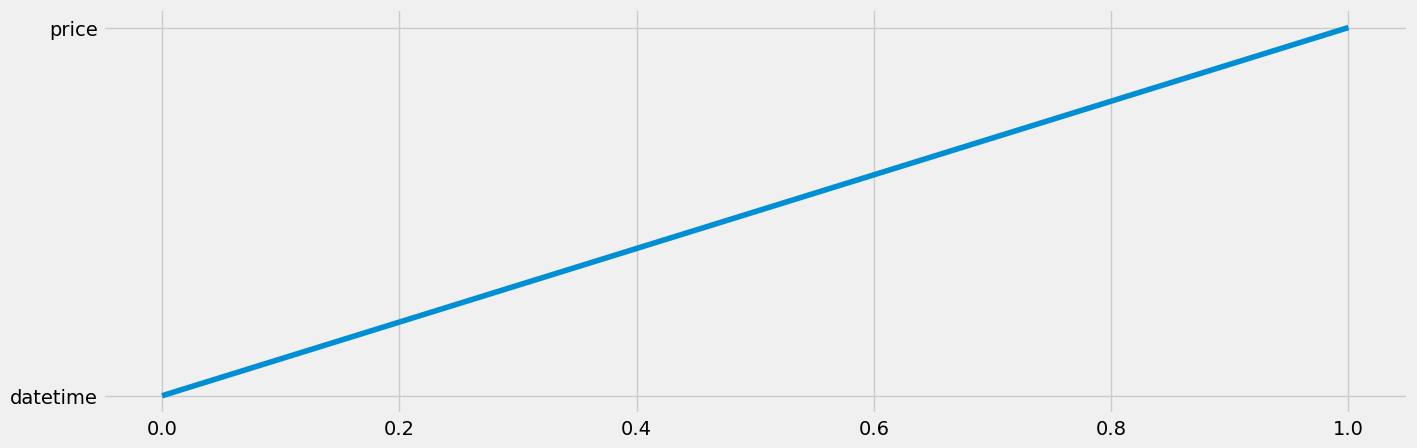

In [83]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_calendar)

# Decomposition

In [ ]:
# Attempt to change type from string to integer
df_calendar['datetime'] = df_calendar['datetime'].astype('int64')

In [ ]:
# Attempt to index again

# Set the "Date" column as the index

from datetime import datetime

df_calendar['datetime'] = pd.to_datetime(df_calendar['datetime']) # Create a datetime column from "Date.""
df_calendar = df_calendar.set_index('datetime') # Set the datetime as the index of the dataframe.
df_calendar.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_calendar.head()

In [ ]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_calendar, model='additive')